In [ ]:
# import things

In [ ]:
# REQUIREMENT: Do not add code from Tasks 2 or 4
# REQUIREMENT: All dataset prep (crop/pad/patch/directory structure) must be finalize before attempting this task.
patch_size = ...
patch_dir = 'dataset_for_unet_patched'

In [3]:
def f1(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = TP / (Positives+K.epsilon())
        return recall
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = TP / (Pred_Positives+K.epsilon())
        return precision
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# Define U-Net
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    ...
    return model

In [ ]:
# Build U-Net
# REQUIREMENT: Model summary must be visible
model = simple_unet_model(...)

2024-11-05 23:48:51.520138: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-11-05 23:48:51.520155: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-11-05 23:48:51.520160: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-11-05 23:48:51.520190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-05 23:48:51.520204: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [ ]:
# Setup a generator for training

Found 11132 images belonging to 1 classes.
Found 11132 images belonging to 1 classes.


In [ ]:
# Setup a generator for validation

Found 2783 images belonging to 1 classes.
Found 2783 images belonging to 1 classes.


In [ ]:
# EarlyStopping()
from keras.callbacks import EarlyStopping
cb = EarlyStopping(...)

In [ ]:
# This is where the magic happens
# REQUIREMENT: The epoch logs must be visible showing validation loss and validation f1.
history = model.fit(...)

Epoch 1/100


2024-11-05 23:48:53.896573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


696/696 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.9904 - f1: 0.2343

2024-11-05 23:49:52.074599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


696/696 [==============================] - 66s 92ms/step - loss: 0.0358 - accuracy: 0.9904 - f1: 0.2343 - val_loss: 0.0107 - val_accuracy: 0.9965 - val_f1: 0.6523
Epoch 2/100
696/696 [==============================] - 66s 95ms/step - loss: 0.0125 - accuracy: 0.9956 - f1: 0.7035 - val_loss: 0.0065 - val_accuracy: 0.9975 - val_f1: 0.7533
Epoch 3/100
696/696 [==============================] - 67s 97ms/step - loss: 0.0098 - accuracy: 0.9962 - f1: 0.7589 - val_loss: 0.0059 - val_accuracy: 0.9978 - val_f1: 0.7701
Epoch 4/100
696/696 [==============================] - 68s 98ms/step - loss: 0.0091 - accuracy: 0.9964 - f1: 0.7624 - val_loss: 0.0060 - val_accuracy: 0.9977 - val_f1: 0.7575
Epoch 5/100
696/696 [==============================] - 68s 97ms/step - loss: 0.0087 - accuracy: 0.9965 - f1: 0.7755 - val_loss: 0.0055 - val_accuracy: 0.9978 - val_f1: 0.7785
Epoch 6/100
696/696 [==============================] - 66s 95ms/step - loss: 0.0088 - accuracy: 0.9966 - f1: 0.7755 - val_loss: 0.0052 - 

In [ ]:
# REQUIREMENT: Save your model, it is a deliverable
# REQUIREMENT: naming convention 'studentname_studentnumber_unet_model_patchsizepx.h5'
example_file_name = f'alican_123456_unet_model_{patch_size}px.h5'
print(example_file_name)
model.save(example_file_name)

alican_123456_unet_model_256px.h5


/Users/alican/anaconda3/envs/y2b_24/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# REQUIREMENT: Run and display the output of this cell.
# REQUIREMENT: Do not change the code.
best_val_loss = min(history.history['val_loss'])
best_val_f1 = max(history.history['val_f1'])
print(f"Best validation loss: {best_val_loss}")
print(f"Best validation f1: {best_val_f1}")

Best validation loss: 0.004732396919280291
Best validation f1: 0.8092314600944519


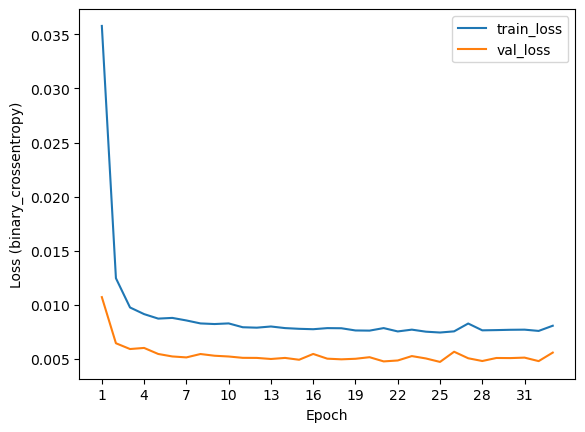

In [ ]:
# REQUIREMENT: Run and display the output of this cell.
# REQUIREMENT: Do not change the code.
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(loss) + 1)

plt.plot(epochs, loss, label='train_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss (binary_crossentropy)')
_ = plt.xticks(np.arange(1, len(loss) + 1, 3))

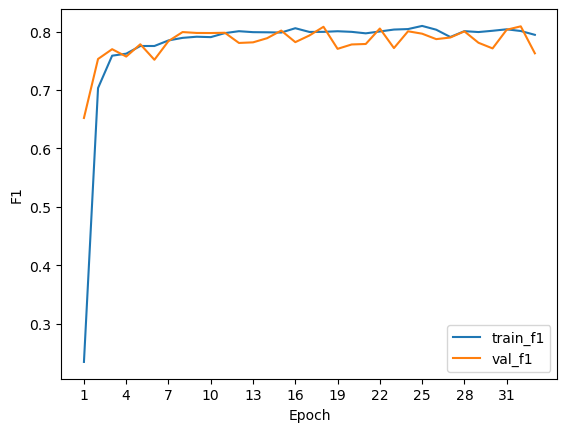

In [ ]:
# REQUIREMENT: Run and display the output of this cell.
# REQUIREMENT: Do not change the code.
train_f1 = history.history['f1']
val_f1 = history.history['val_f1']

epochs = np.arange(1, len(train_f1) + 1)

plt.plot(epochs, train_f1, label='train_f1')
plt.plot(epochs, val_f1, label='val_f1')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('F1')
_ = plt.xticks(np.arange(1, len(loss) + 1, 3))